In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


## Task 2: Creating the Notebook and Loading Data

In [2]:
diabetes = pd.read_csv("/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv")
display(diabetes.head())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Task 3: A Histogram For Age Distributions

Text(0, 0.5, 'Number of Participants')

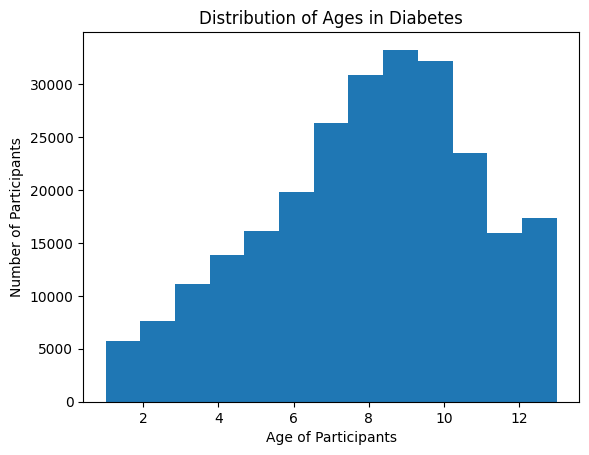

In [3]:
plt.hist(diabetes["Age"], bins = 13)
plt.title("Distribution of Ages in Diabetes")
plt.xlabel("Age of Participants")
plt.ylabel("Number of Participants")

## Task 4: General Health over Time

Text(0, 0.5, 'Measurement of Health')

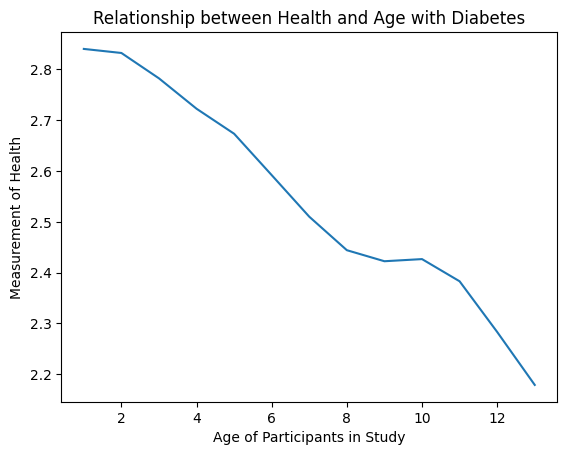

In [4]:
health_by_age = diabetes.groupby("Age")[["GenHlth"]].agg("mean")
health_by_age["Health"] = 5 - health_by_age["GenHlth"]
health_by_age.sort_index()

x_axis = health_by_age.index
y_axis = health_by_age["Health"]

plt.plot(x_axis, y_axis)
plt.title("Relationship between Health and Age with Diabetes")
plt.xlabel("Age of Participants in Study")
plt.ylabel("Measurement of Health")

## Task 5: A Heat Map of All Columns

<Axes: >

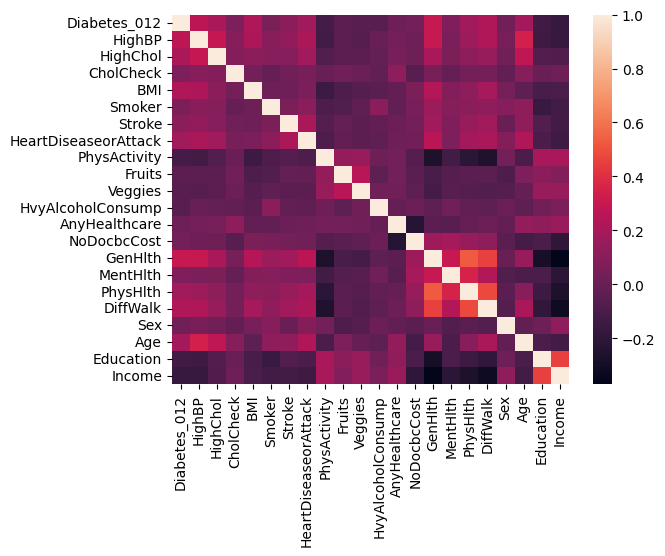

In [5]:
diabetes_corr = diabetes.corr()
seaborn.heatmap(diabetes_corr)

## Task 6: Subset Heat Maps

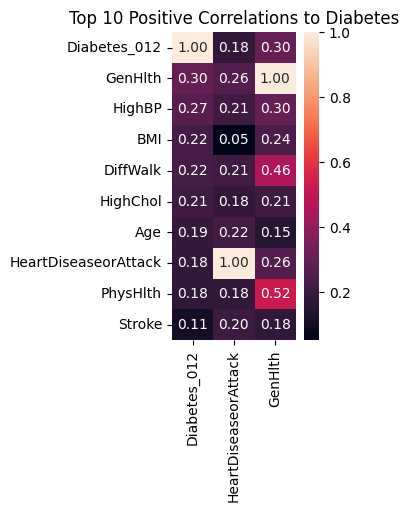

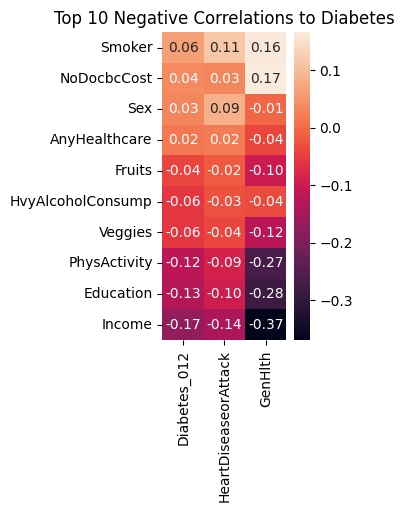

In [6]:
subsets = ["Diabetes_012", "HeartDiseaseorAttack", "GenHlth"]

diabetes_corr_subset = diabetes_corr.loc[:, subsets].sort_values(by = "Diabetes_012", ascending = False)
plt.figure(figsize = (2, 4))
plt.title("Top 10 Positive Correlations to Diabetes")
seaborn.heatmap(diabetes_corr_subset.head(10), annot = True, fmt = ".2f")
plt.show()

plt.figure(figsize = (2, 4))
plt.title("Top 10 Negative Correlations to Diabetes")
seaborn.heatmap(diabetes_corr_subset.tail(10), annot = True, fmt = ".2f")
plt.show()

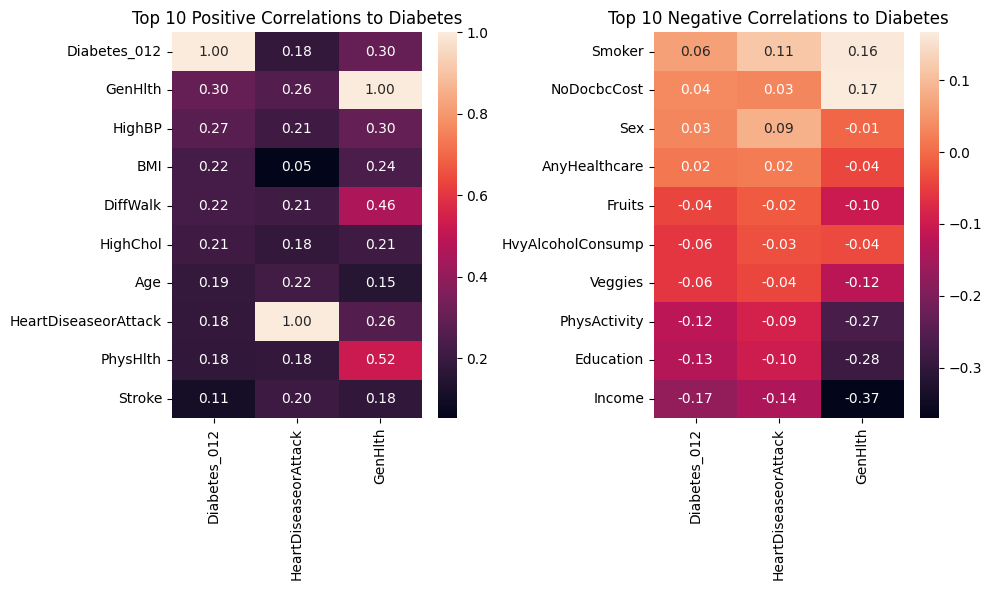

In [7]:
# Same heat maps as above just plotted side by side for easier comparison
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 6))

seaborn.heatmap(diabetes_corr_subset.head(10), ax = axis1, annot = True, fmt = ".2f")
axis1.set_title("Top 10 Positive Correlations to Diabetes")

seaborn.heatmap(diabetes_corr_subset.tail(10), ax = axis2, annot = True, fmt = ".2f")
axis2.set_title("Top 10 Negative Correlations to Diabetes")

plt.tight_layout()
plt.show()

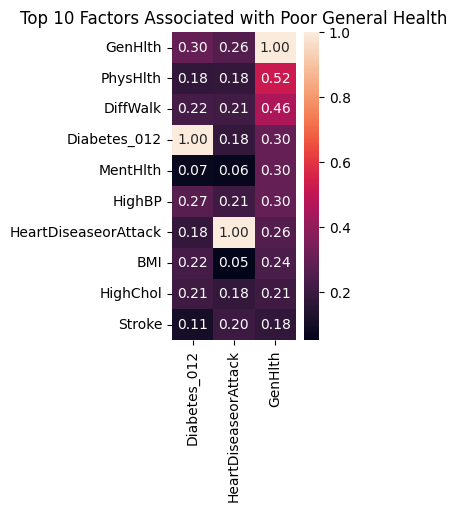

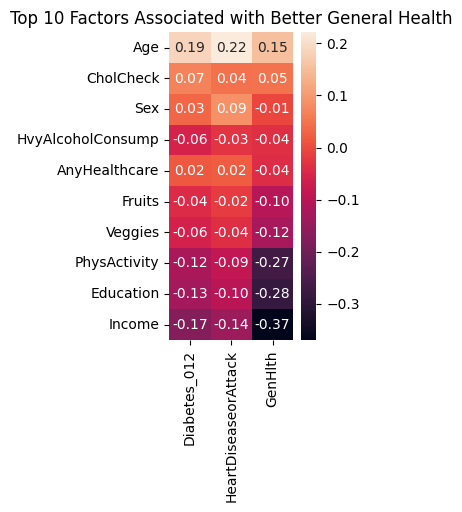

In [8]:
diabetes_corr_subset.sort_values("GenHlth", ascending = False, inplace = True)

plt.figure(figsize = (2, 4))
plt.title("Top 10 Factors Associated with Poor General Health")
seaborn.heatmap(diabetes_corr_subset.head(10), annot = True, fmt = ".2f")
plt.show()

plt.figure(figsize = (2, 4))
plt.title("Top 10 Factors Associated with Better General Health")
seaborn.heatmap(diabetes_corr_subset.tail(10), annot = True, fmt = ".2f")
plt.show()

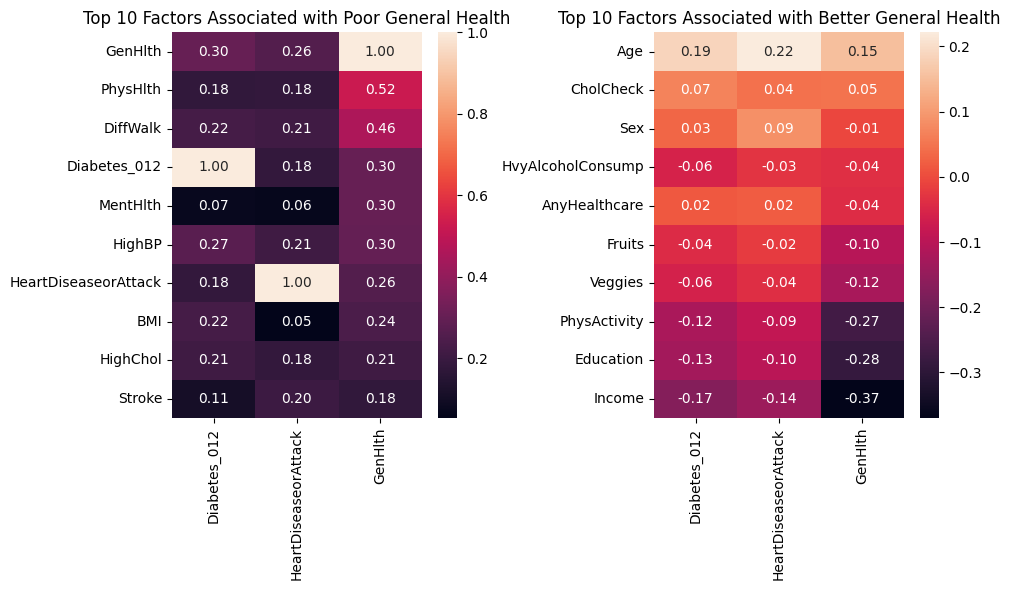

In [9]:
# Same heat maps as above just plotted side by side for easier comparison
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 6))

seaborn.heatmap(diabetes_corr_subset.head(10), ax = axis1, annot = True, fmt = ".2f")
axis1.set_title("Top 10 Factors Associated with Poor General Health")

seaborn.heatmap(diabetes_corr_subset.tail(10), ax = axis2, annot = True, fmt = ".2f")
axis2.set_title("Top 10 Factors Associated with Better General Health")

plt.tight_layout()
plt.show()

It looks like low physical movement (DiffWalk and PhysHlth) have a strong relationship for both diabetes and poor general health.  Diabetes is actually positively related to poor general health and vice versa where poor general health is related to a higher chance someone would have diabetes.  While one is not the cause for the other, they definitely show that they affect each other.  If someone has difficulty moving around and poor physical health, they are more likely to have high cholestrol and other health issues included diabetes.  If someone has poor general health they most likely do not have a lot of physical activity which can lead to high BMI and difficulty walking which in turn points back to poor general health.  It seems almost like a cycle where things affect one another and continue to point back to the "first" cause.

## Task 7: A Pair Plot: Body Mass Index vs. Age

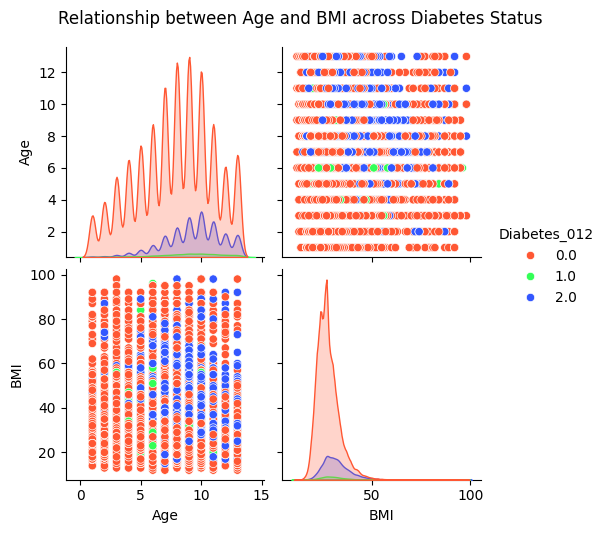

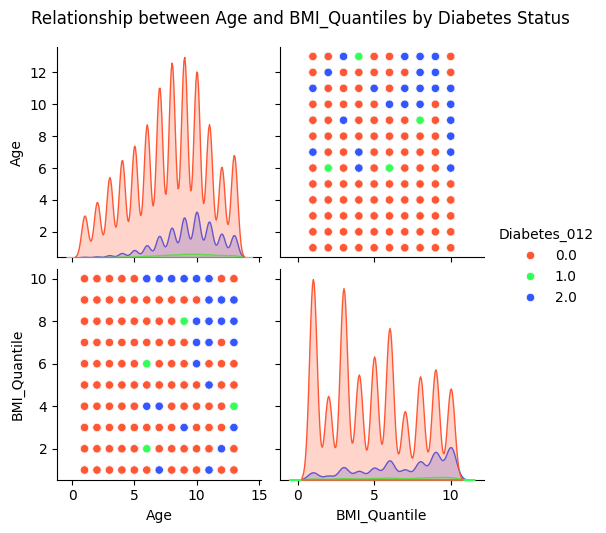

In [10]:
diabetes_pair_plot = seaborn.pairplot(diabetes, vars = ["Age", "BMI"], hue = "Diabetes_012", palette=['#FF5733', '#33FF57', '#3357FF'])
diabetes_pair_plot.fig.suptitle("Relationship between Age and BMI across Diabetes Status", y = 1.05)
plt.show()

diabetes["BMI_Quantile"] = pd.qcut(diabetes["BMI"], 10, labels = False) + 1
BMI_pair_plot = seaborn.pairplot(diabetes, vars = ["Age", "BMI_Quantile"], hue = "Diabetes_012", palette=['#FF5733', '#33FF57', '#3357FF'])
BMI_pair_plot.fig.suptitle("Relationship between Age and BMI_Quantiles by Diabetes Status", y=1.05)
plt.show()